In [ ]:
%%bash
pip install -qq git+https://github.com/autodistill/autodistill.git              \
  git+https://github.com/autodistill/autodistill-grounding-dino.git             \
  git+https://github.com/roboflow/roboflow-python.git                           \
  git+https://github.com/roboflow/supervision.git                               \
  git+https://github.com/autodistill/autodistill-grounded-sam.git               \
  accelerate bitsandbytes autodistill-owlv2                                     \
  autodistill-llava autodistill-detic &>/dev/null

In [ ]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2


base_model = GroundedSAM(
    ontology=CaptionOntology(
        {
            "car": "car"
        }
    )
)

results = base_model.predict("cars-in-lot.jpg")

In [ ]:
results.mask

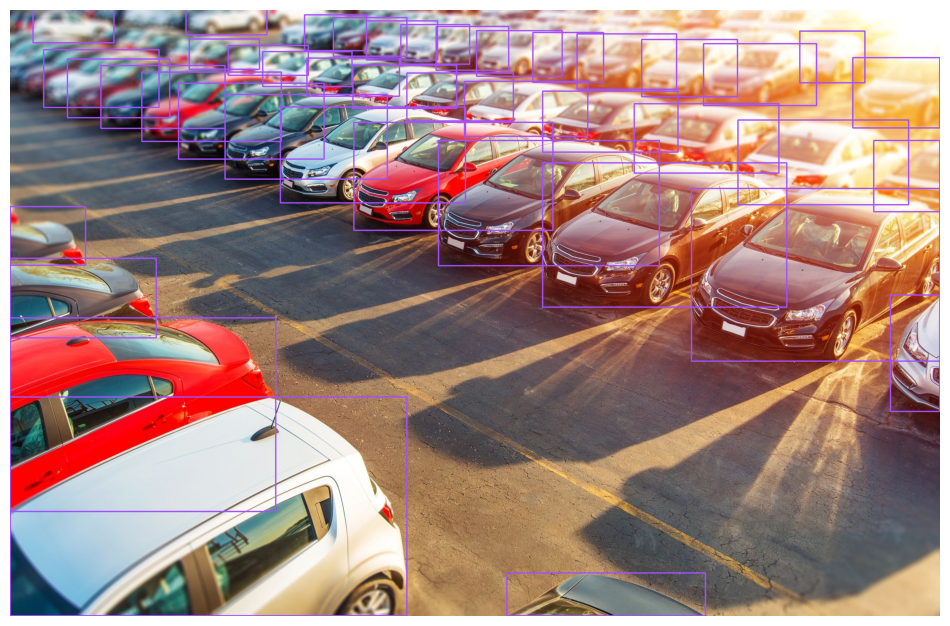

In [ ]:
import supervision as sv

image = cv2.imread("cars-in-lot.jpg")

annotator = sv.BoundingBoxAnnotator()

annotated_image = annotator.annotate(
    scene=image,
    detections=results
)

sv.plot_image(annotated_image)

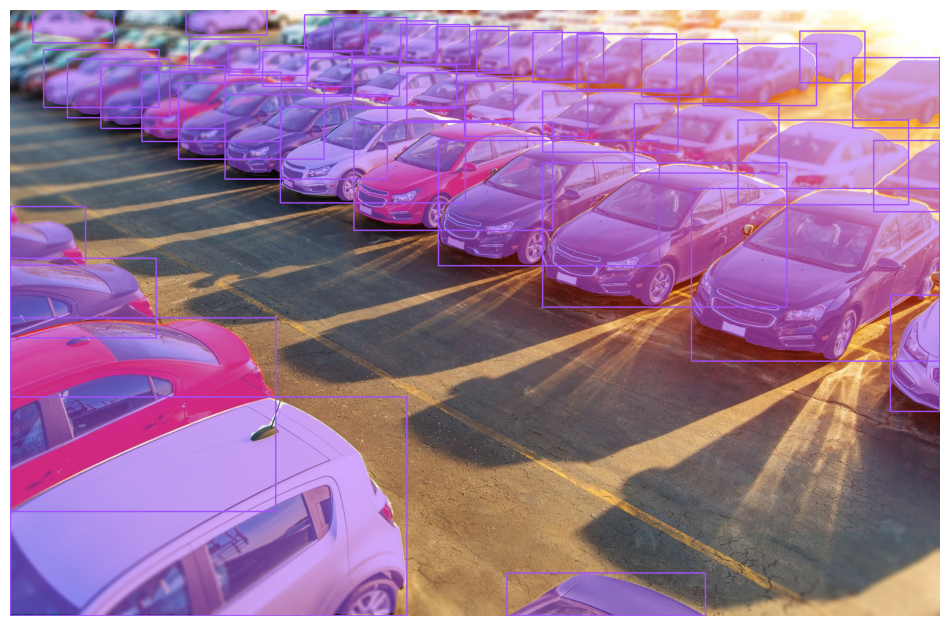

In [ ]:
mask_annotator = sv.MaskAnnotator()
masked_image = mask_annotator.annotate(
    scene=image,
    detections=results
)

sv.plot_image(masked_image)